In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

                                                            GETTING IDEA OF DATA AND DROPPED UNNECESSARY COLUMNS                                                                                        

In [68]:
df = pd.read_csv('bikes.csv')
df = df.drop(columns=['instant'])
df['dteday'] = pd.to_datetime(df['dteday'])
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


                                                                                EDA OF DATA WITH VISUALISATIONS                                                                                       

<Axes: >

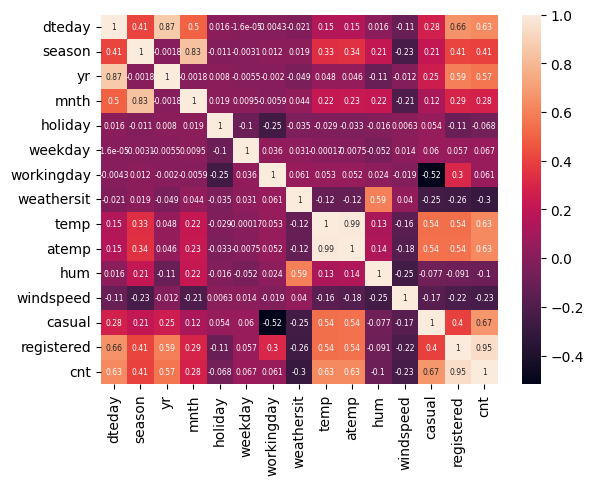

In [69]:
matrix = df.corr()
sns.heatmap(matrix, annot=True, annot_kws={"size": 5.5})

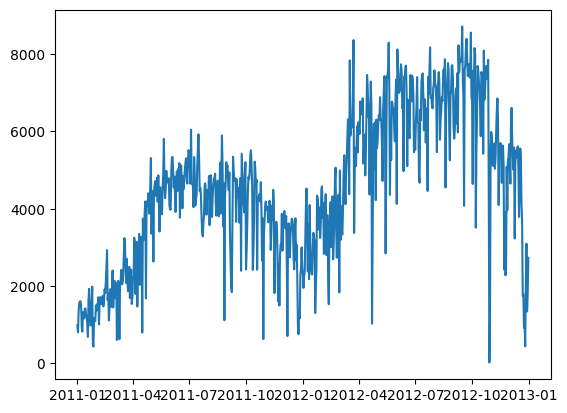

In [70]:
plt.plot(df['dteday'], df['cnt'])
plt.show()

Text(0, 0.5, 'bikes sold')

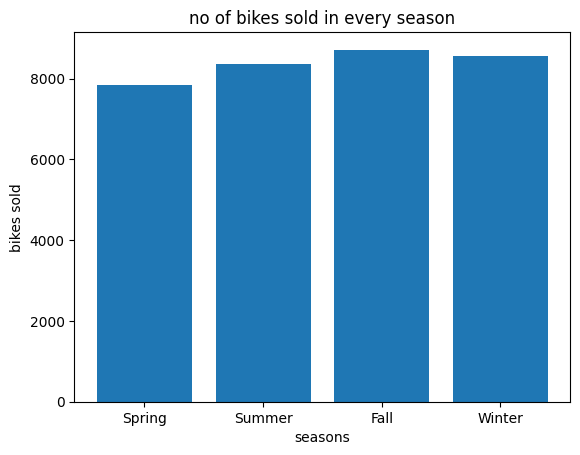

In [71]:
plt.bar(x=df['season'], height=df['cnt'])
plt.title('no of bikes sold in every season')
plt.xlabel('seasons')
plt.xticks([1, 2, 3, 4], ["Spring", "Summer", "Fall", "Winter"])
plt.ylabel('bikes sold')

Text(0, 0.5, 'bikes sold')

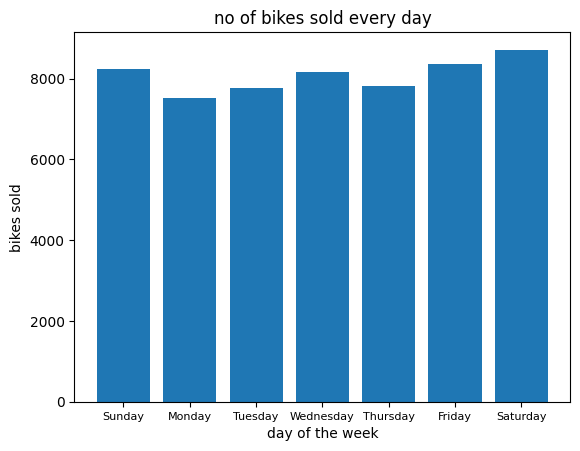

In [72]:
plt.bar(x=df['weekday'], height=df['cnt'])
plt.title('no of bikes sold every day')
plt.xlabel('day of the week')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], fontsize=8)
plt.ylabel('bikes sold')

Text(0, 0.5, 'bikes sold')

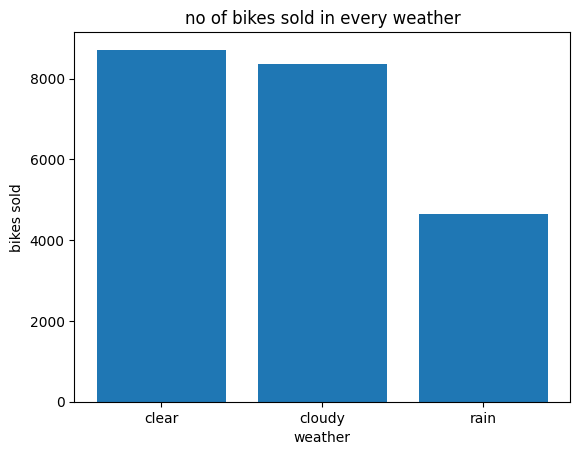

In [73]:
plt.bar(x=df['weathersit'], height=df['cnt'])
plt.title('no of bikes sold in every weather')
plt.xlabel('weather')
plt.xticks([1, 2, 3], ["clear", "cloudy", "rain"])
plt.ylabel('bikes sold')

Text(0, 0.5, 'bikes sold')

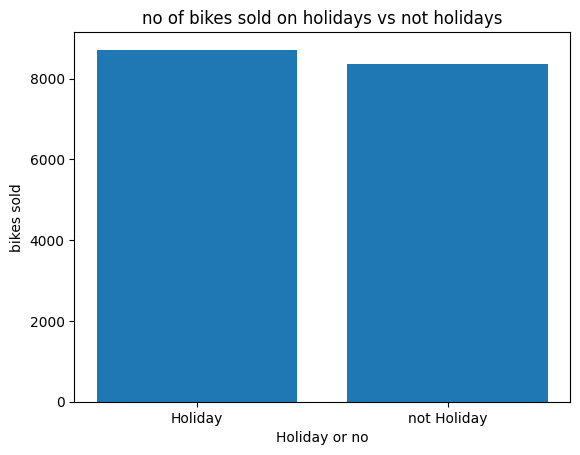

In [74]:
plt.bar(x=df['workingday'], height=df['cnt'])
plt.title('no of bikes sold on holidays vs not holidays')
plt.xlabel('Holiday or no')
plt.xticks([0, 1], ["Holiday", "not Holiday"])
plt.ylabel('bikes sold')

                                                                CREATED A NEW FEATURE CALLED ISIDEALDAY COMBINING TWO OTHERS                                                                                

In [75]:
df['isIdealDay'] =(
    (df['workingday']==0) &
    (df['weathersit']<=2)
).astype(int)
df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,isIdealDay
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,0
727,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,0
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,1
729,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,1


                                                                                DATA PREPROCESSING                                                                                                       

In [76]:
X = df.drop(columns=['dteday','casual','registered','cnt'])
y = df['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                                                                        TRAINING THE RANDOM FOREST REGRESSOR                                                                                                

In [ ]:
rf = RandomForestRegressor(random_state=82)


# using GridSearch for tuning hyperparams
param_grid = {
    'n_estimators': [80, 100, 120, 150],    
    'max_depth': [None, 10, 15, 20],        
    'min_samples_split': [2, 5],            
    'min_samples_leaf': [1, 2],             
    'max_features': ['sqrt', 'log2'],       
    'bootstrap': [True]                     
}

# GridSearch setup
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                
    scoring='r2',       
    n_jobs=-1,           
    verbose=2
)

# Fit search
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV R² Score:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test R² Score:", r2_score(y_test, y_pred))

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best Parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best CV R² Score: 0.8692591064730181
Test R² Score: 0.8787534851967431


In [79]:
gbr = GradientBoostingRegressor(random_state=82)

# Focused parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0]
}

# GridSearch setup
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# Fit search
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV R² Score:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test R² Score:", r2_score(y_test, y_pred))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.8}
Best CV R² Score: 0.8754224164103839
Test R² Score: 0.8994214473160977


AS WE CAN SEE GRADIENTBOOSTED REGRESSOR PERFORMS THE BEST WITH 87.54 CROSS VAL SCORE AND 89.94 TEST SCORE